# Simple Corridor - Default


This is a simple environment where agents start at the left end target is at the other end.

In [1]:
import gym
import ray
from ray.rllib.agents.ppo import PPOTrainer
from ray.rllib.agents.dqn import DQNTrainer

import pygame
import numpy as np

import torch
from IPython.display import clear_output
from IPython import display
import random
import matplotlib.pylab as plt
import copy
import time

pygame 2.1.2 (SDL 2.0.16, Python 3.10.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
class SimpleCorridor(gym.Env):
    def __init__(self, config):
        self.length = config["corridor_length"]
        self.mode = config["mode"] # "fixed" or "random"
        
        if self.mode == "fixed":
            self.start_pos = 0
            self.end_pos = self.length-1
        elif self.mode == "random":
            self.start_pos, self.end_pos = random.sample(range(self.length),2)
        self.action_space = gym.spaces.Discrete(2)
        self.observation_space = gym.spaces.Box(0.0, self.length, shape=(2,),dtype='int32')

    def reset(self):
        self.cur_pos = self.start_pos
        return np.array([self.cur_pos, self.end_pos])

    def step(self, action):
        if action == 0 and self.cur_pos > 0: # walk left
            self.cur_pos -= 1
        if action == 1 and self.cur_pos < self.length-1:
            self.cur_pos += 1
        done = self.cur_pos == self.end_pos
        reward = 1.0 if done else -0.1
        return np.array([self.cur_pos, self.end_pos]), reward, done, {} 
    def render(self, mode="rgb_array"):
        canvas = pygame.Surface((20, 20*self.length+1))
        canvas.fill((255, 255, 255))
        for i in range(self.length+2):
            pygame.draw.line(canvas, 0, (0, 20*(i)), (20, 20*(i)), width=1)
        pygame.draw.line(canvas, 0, (0,0), (0, 20*(i)), width=1)
        pygame.draw.line(canvas, 0, (19,0), (19, 20*(i)), width=1)
        pygame.draw.circle(canvas, (0, 0, 255), (10,self.cur_pos*20+10), 7)
        pygame.draw.circle(canvas, (255, 0, 0), (10,(self.end_pos)*20+10), 7)
        plArray = np.array(pygame.surfarray.pixels3d(canvas))
        plt.imshow(plArray)        
        plt.axis("off")

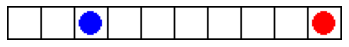

In [3]:
env = SimpleCorridor({"corridor_length": 10, "mode":"random"})
env.reset()
env.render()

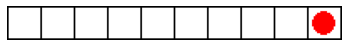

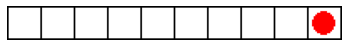

In [4]:
env.reset()
done = False

while not done:
    plt.cla()
    display.clear_output(wait=True)

    obs, reward, done, _ = env.step(env.action_space.sample())
    env.render()
    time.sleep(0.01)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.gcf()

In [56]:
trainer = PPOTrainer(
    config={
        "env": SimpleCorridor,
        "framework": "torch",
        "env_config": {
            "corridor_length": 10,
            "mode":"random"
        },
        "num_workers": 4,
        
            "model": {
            "fcnet_hiddens": [64, 64],
            "fcnet_activation": "relu",
        },
    }
)

(RolloutWorker pid=2800120) pygame 2.1.2 (SDL 2.0.16, Python 3.10.4)
(RolloutWorker pid=2800120) Hello from the pygame community. https://www.pygame.org/contribute.html
(RolloutWorker pid=2800121) pygame 2.1.2 (SDL 2.0.16, Python 3.10.4)
(RolloutWorker pid=2800121) Hello from the pygame community. https://www.pygame.org/contribute.html
(RolloutWorker pid=2800122) pygame 2.1.2 (SDL 2.0.16, Python 3.10.4)
(RolloutWorker pid=2800122) Hello from the pygame community. https://www.pygame.org/contribute.html
(RolloutWorker pid=2800123) pygame 2.1.2 (SDL 2.0.16, Python 3.10.4)
(RolloutWorker pid=2800123) Hello from the pygame community. https://www.pygame.org/contribute.html


(RolloutWorker pid=2800120) 2022-07-06 16:11:28,462	WARNING env.py:135 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your config dictionary, or `soft_horizon`. However, if you haven't, 'horizon' will default to infinity, and your environment will not be reset.
(RolloutWorker pid=2800120) /home/ajit.kumar@SNU.IN/anaconda3/envs/udemy-rl/lib/python3.10/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/c10/cuda/CUDAFunctions.cpp:112.)
(RolloutWorker pid=2800120)   return torch._C._cuda_getDeviceCount() > 0
(RolloutWorker pid=2800121) 2022-07-06 16:11:28,462	WARNING env.py:135 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if 

In [57]:
for i in range(20):
    
    results = trainer.train()
    print(f"Iter: {i}; avg. reward={results['episode_reward_mean']}")


Iter: 0; avg. reward=-2.0627118644067783
Iter: 1; avg. reward=-0.6004032258064513
Iter: 2; avg. reward=0.2621621621621622
Iter: 3; avg. reward=0.4908675799086758
Iter: 4; avg. reward=0.5958333333333333
Iter: 5; avg. reward=0.64248291571754
Iter: 6; avg. reward=0.693387589013225
Iter: 7; avg. reward=0.7113592233009709
Iter: 8; avg. reward=0.7332417582417583
Iter: 9; avg. reward=0.7428443649373881
Iter: 10; avg. reward=0.7526452732003469
Iter: 11; avg. reward=0.7532062391681109
Iter: 12; avg. reward=0.7570815450643776
Iter: 13; avg. reward=0.7025819265143992
Iter: 14; avg. reward=0.7387184115523465
Iter: 15; avg. reward=0.7586177474402731
Iter: 16; avg. reward=0.7600340136054421
Iter: 17; avg. reward=0.707843137254902
Iter: 18; avg. reward=0.7378623188405797
Iter: 19; avg. reward=0.7588235294117648


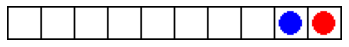

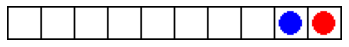

In [67]:
for _ in range(20):

    env = SimpleCorridor({"corridor_length": 10, "mode":"random"})
    # Get the initial observation (should be: [0.0] for the starting position).
    obs = env.reset()
    done = False
    total_reward = 0.0
    # Play one episode.
    while not done:
        plt.cla()
        env.render()

        action = trainer.compute_single_action(obs)
        obs, reward, done, info = env.step(action)
        total_reward += reward
        time.sleep(0.1)
        display.clear_output(wait=True)
        display.display(plt.gcf())
        plt.gcf()


# TODO: how to save and load the model

# TODO: How to use use tensorboard to view the training history

In [45]:
xx = 0

for i in range(1000):
    x,y = random.sample(range(10),2)
    if x > y:
        xx +=1 
print(xx)

513
